In [258]:
import numpy as np
import pandas as pd

In [259]:
df=pd.read_csv('/content/laptop_data.csv')

In [260]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [262]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [263]:
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Ram'] = df['Ram'].str.replace('GB', '')

In [264]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

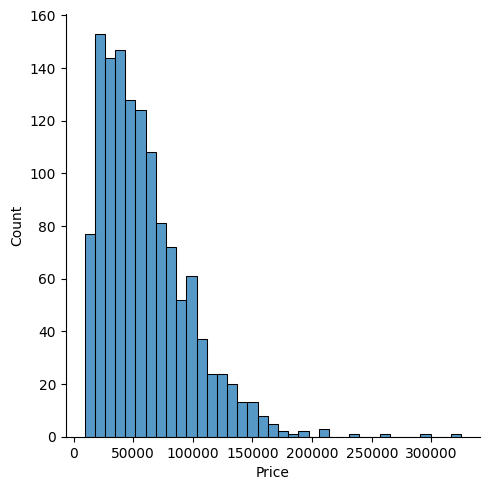

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df['Price'])

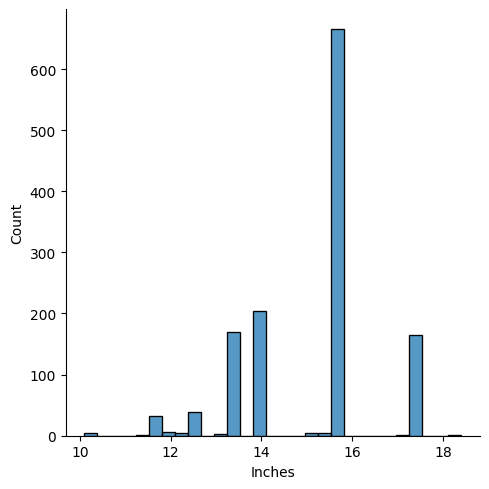

In [266]:
sns.displot(df['Inches'])

In [267]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [268]:
df['Ips Panel']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [269]:
new=df['ScreenResolution'].str.split('x',expand=True)

In [270]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [271]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [272]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [273]:
numerical_df = df.select_dtypes(include=np.number)
numerical_df.corr()['Price']

,Price
Inches,0.068197
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191226
Ips Panel,0.252208
X_res,0.556529
Y_res,0.552809


In [274]:
df['ppi']=((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']

In [275]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [276]:
df['Cpu']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [277]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [278]:
df['Cpu']=df['Cpu'].apply(fetch_processor)

In [279]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,527
Intel Core i5,423
Other Intel Processor,154
Intel Core i3,136
AMD Processor,63


<Axes: xlabel='Cpu', ylabel='Price'>

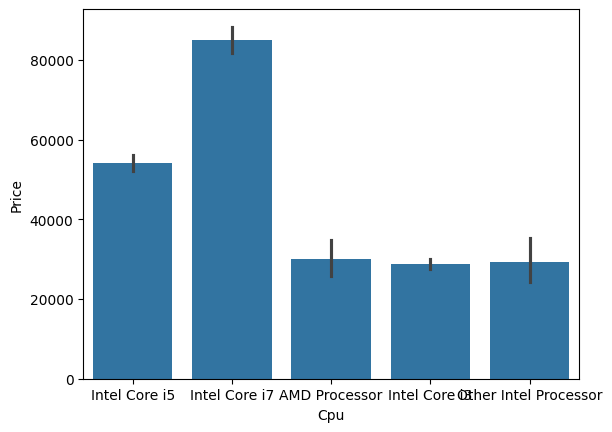

In [280]:
sns.barplot(x=df['Cpu'],y=df['Price'])

In [281]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# The issue is with this line. The regex should also include spaces.
# Modified regex to replace non-digit characters including whitespaces:
df['first'] = df['first'].str.replace(r'\D+', '', regex=True)

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Similar issue might be present in the 'second' column, so applying the same fix:
df['second'] = df['second'].str.replace(r'\D+', '', regex=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-281-6dbcd7308f78>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [282]:
df['Gpu']=df['Gpu'].str.split(' ',expand=True)[0]

In [283]:
df['Gpu'].value_counts()

,count
Gpu,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [284]:
df=df[df['Gpu']!='ARM']

In [285]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips Panel,ppi,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5,8,128 SSD,Intel,macOS,1.37,71378.6832,0,1,226.983005,0,128,0,0
1,Apple,Ultrabook,Intel Core i5,8,128 Flash Storage,Intel,macOS,1.34,47895.5232,0,0,127.677940,0,0,0,128
2,HP,Notebook,Intel Core i5,8,256 SSD,Intel,No OS,1.86,30636.0000,0,0,141.211998,0,256,0,0
3,Apple,Ultrabook,Intel Core i7,16,512 SSD,AMD,macOS,1.83,135195.3360,0,1,220.534624,0,512,0,0
4,Apple,Ultrabook,Intel Core i5,8,256 SSD,Intel,macOS,1.37,96095.8080,0,1,226.983005,0,256,0,0


In [286]:
df.drop(columns=['Memory','Hybrid','Flash_Storage'],inplace=True)

In [287]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [288]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [289]:
df['OpSys']=df['OpSys'].apply(cat_os)

In [290]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips Panel,ppi,HDD,SSD
0,Apple,Ultrabook,Intel Core i5,8,Intel,Mac,1.37,71378.6832,0,1,226.983005,0,128
1,Apple,Ultrabook,Intel Core i5,8,Intel,Mac,1.34,47895.5232,0,0,127.677940,0,0
2,HP,Notebook,Intel Core i5,8,Intel,Others/No OS/Linux,1.86,30636.0000,0,0,141.211998,0,256
3,Apple,Ultrabook,Intel Core i7,16,AMD,Mac,1.83,135195.3360,0,1,220.534624,0,512
4,Apple,Ultrabook,Intel Core i5,8,Intel,Mac,1.37,96095.8080,0,1,226.983005,0,256


<Axes: >

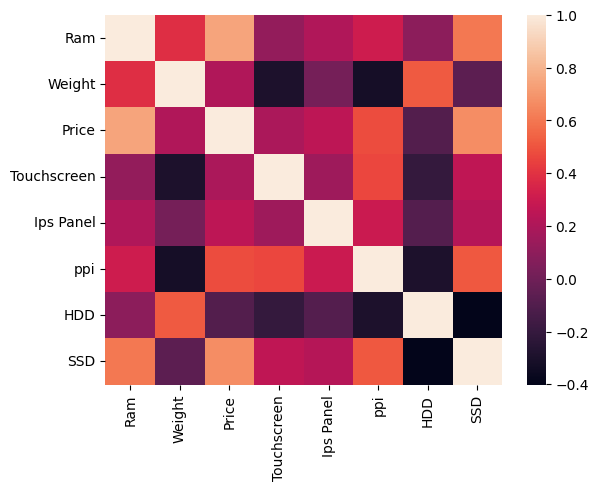

In [291]:
df['OpSys'] = pd.Categorical(df['OpSys'])
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr())

In [292]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [293]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [294]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [295]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [296]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.800240596612301
MAE 0.20453995815620046


In [297]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8025355126649508
MAE 0.2037972433381517


In [298]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7980036909700868
MAE 0.2060403823639508


In [299]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7887149013912087
MAE 0.19667932641748875


In [300]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7979317597938181
MAE 0.19935544027859126


In [301]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7767571730277032
MAE 0.2037235023910893


In [302]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 2, 4, 5])
    ],
    remainder='passthrough')
step2 = RandomForestRegressor(random_state=3)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)])
param_grid = {
    'step2__n_estimators': [50, 100, 150],
    'step2__max_samples': [0.5, 0.7, 1.0],
    'step2__max_features': [0.5, 0.75, 1.0],
    'step2__max_depth': [10, 15, 20]}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_pipe = grid_search.best_estimator_
y_pred = best_pipe.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'step2__max_depth': 20, 'step2__max_features': 0.5, 'step2__max_samples': 1.0, 'step2__n_estimators': 150}
R2 score: 0.8713714955880814
MAE: 0.1595625690969468


In [303]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7964740170297333
MAE 0.2179008014855


In [304]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 2, 4, 5])
    ],
    remainder='passthrough')
step2 = GradientBoostingRegressor()
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)])
param_grid = {
    'step2__n_estimators': [100, 300, 500],
    'step2__learning_rate': [0.01, 0.1, 0.2],
    'step2__max_depth': [3, 5, 7],
    'step2__subsample': [0.7, 0.85, 1.0]}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_pipe = grid_search.best_estimator_
y_pred = best_pipe.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'step2__learning_rate': 0.1, 'step2__max_depth': 3, 'step2__n_estimators': 500, 'step2__subsample': 0.7}
R2 score: 0.8692849653173023
MAE: 0.1590651913392661


In [305]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 2, 4, 5])
    ],
    remainder='passthrough')
step2 = XGBRegressor()
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
param_grid = {
    'step2__n_estimators': [50, 100, 200],
    'step2__learning_rate': [0.01, 0.1, 0.3, 0.5],
    'step2__max_depth': [3, 5, 7, 10],
    'step2__subsample': [0.7, 0.9, 1.0],
    'step2__colsample_bytree': [0.7, 0.9, 1.0]
}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_pipe = grid_search.best_estimator_
y_pred = best_pipe.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'step2__colsample_bytree': 0.7, 'step2__learning_rate': 0.1, 'step2__max_depth': 5, 'step2__n_estimators': 200, 'step2__subsample': 0.9}
R2 score: 0.8797628260218133
MAE: 0.15123487852475656
